# SMS Spam Classifier

### Introduction
In this project I focus on developing an SMS spam classifier using SMS Spam Collection data which I acquired from Kaggle. The goal is to build a robust prediction model that accurately classifies text messages as either spam or legitimate (ham).

### Dataset Overview 
The SMS Spam Collection dataset comprises 5,574 SMS messages in English, labeled as spam or ham. Each message is represented by a raw text and a corresponding label.

In [1]:
# importing necessary modules.
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Since there are very less value available in column 2, 3 and 4. It should be okay to drop them.
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.shape

(5572, 2)

Now only two columns remained called v1 and v2. It would be simplier for us to let them name with X and y.

In [8]:
data.rename(columns={'v1':'y','v2':'x'},inplace=True)

In [9]:
data.head(3)

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
data['y'].value_counts()

ham     4825
spam     747
Name: y, dtype: int64

We see that the target value is highly unbalanced.

In [11]:
# Machines are better with number. So let's convert those labels in y to one.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
data['y']=le.fit_transform(data['y'])

In [13]:
data.head()

,y,x
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Checking for null values.
data.isnull().sum()

y    0
x    0
dtype: int64

In [15]:
# Checking for duplicate values.
data.duplicated().sum()

403

In [16]:
data=data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

### EDA

In [19]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

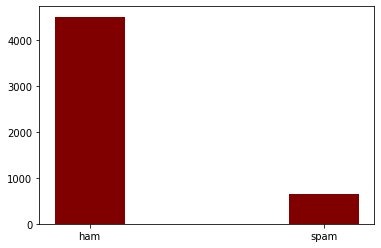

In [20]:
plt.bar(('ham','spam'),data['y'].value_counts(),width=0.3,color='maroon')

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rckzs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# for finding number of character.
data['no. char']=data['x'].apply(len)

In [24]:
data.head()

,y,x,no. char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# for finding number of words.
data['no. words']=data['x'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
data.head()

,y,x,no. char,no. words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# for finding number of sentences.
data['no. sent']=data['x'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
data.head()

,y,x,no. char,no. words,no. sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
data.describe()

,y,no. char,no. words,no. sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
# Using describe function on spam and ham data simultaneously.
# For ham
data[data['y']==0][['no. char','no. words','no. sent']].describe()

,no. char,no. words,no. sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# For spam
data[data['y']==1][['no. char','no. words','no. sent']].describe()

,no. char,no. words,no. sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can clearly capture the difference in spam and ham. It is reflected on their descriptive analysis chart above.

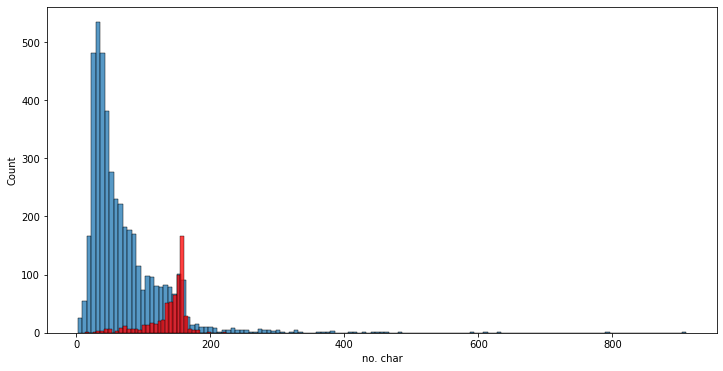

In [32]:
# Visualizing the comparision between spam and ham.
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data['y']==0]['no. char'])
sns.histplot(data[data['y']==1]['no. char'],color='red')
plt.show()

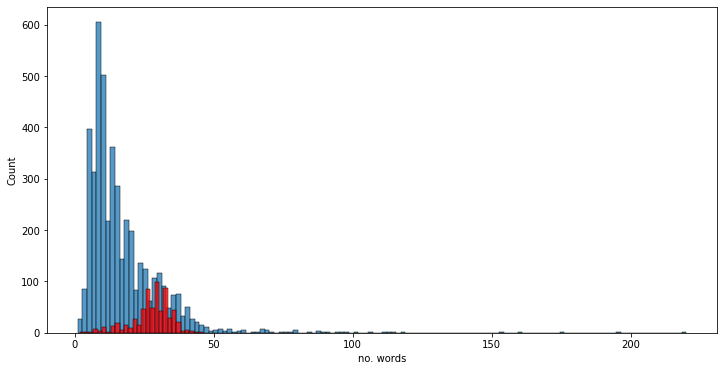

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['y']==0]['no. words'])
sns.histplot(data[data['y']==1]['no. words'],color='red')
plt.show()

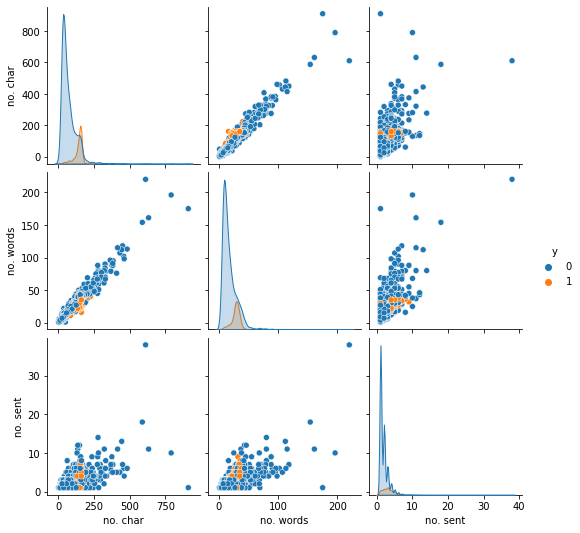

In [34]:
sns.pairplot(data,hue='y')
plt.show()

<AxesSubplot:>

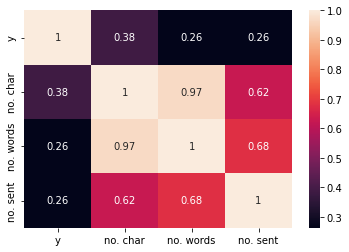

In [35]:
sns.heatmap(data.corr(),annot=True)

In [36]:
# We can see that target variable 'y' is most correlated with no. char column. 

# Text Preprocessing 

In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [38]:
def transform_text(text):
    # Lower case
    text=text.lower()
    # Tokenization
    text=nltk.word_tokenize(text)
    # Special character removal
    target=[]
    for i in text:
        if i.isalnum():
            target.append(i)
    # Stop word and punctuation removal
    text=target[:]
    target.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            target.append(i)
    # Stemming
    text=target[:]
    target.clear()
    for i in text:
        target.append(ps.stem(i))
    return " ".join(target)

In [39]:
transform_text('I am walking towards school')

'walk toward school'

In [40]:
data['transformed_x']=data['x'].apply(transform_text)

In [41]:
data.head()

,y,x,no. char,no. words,no. sent,transformed_x
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Word cloud
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=3,background_color='white')

In [44]:
img=wc.generate(data[data['y']==1]['transformed_x'].str.cat(sep=" "))

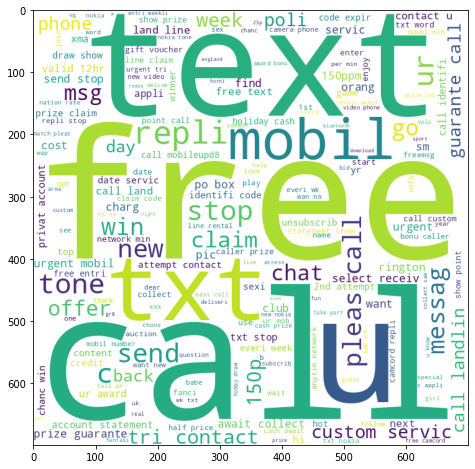

In [45]:
plt.figure(figsize=(15,8))
plt.imshow(img)
plt.show()

In [46]:
img2=wc.generate(data[data['y']==0]['transformed_x'].str.cat(sep=" "))

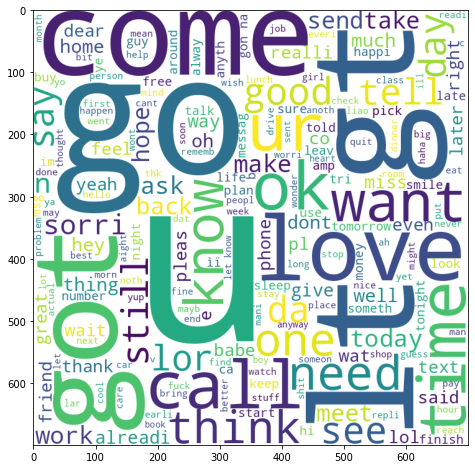

In [47]:
plt.figure(figsize=(15,8))
plt.imshow(img2)
plt.show()

In [48]:
spam_corpus=[]
for msg in data[data['y']==1]['transformed_x'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


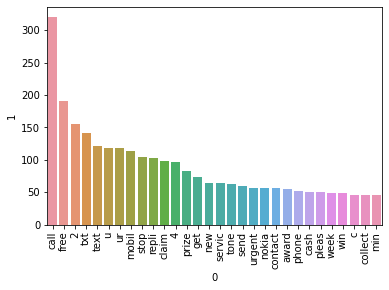

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Text vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [52]:
X=cv.fit_transform(data['transformed_x']).toarray()

In [53]:
X.shape

(5169, 6708)

In [54]:
Y=data['y'].values

In [55]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_predg=gnb.predict(X_test)
print(accuracy_score(y_test,y_predg))
print(confusion_matrix(y_test,y_predg))
print(precision_score(y_test,y_predg))

0.8723897911832946
[[991 139]
 [ 26 137]]
0.4963768115942029


In [60]:
mnb.fit(X_train,y_train)
y_predm=mnb.predict(X_test)
print(accuracy_score(y_test,y_predm))
print(confusion_matrix(y_test,y_predm))
print(precision_score(y_test,y_predm))

0.9659706109822119
[[1102   28]
 [  16  147]]
0.84


In [61]:
bnb.fit(X_train,y_train)
y_predb=bnb.predict(X_test)
print(accuracy_score(y_test,y_predb))
print(confusion_matrix(y_test,y_predb))
print(precision_score(y_test,y_predb))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9249806651198763
Precision -  0.6964285714285714
For  KN
Accuracy -  0.9110595514307811
Precision -  1.0
For  NB
Accuracy -  0.9659706109822119
Precision -  0.84
For  DT
Accuracy -  0.9280742459396751
Precision -  0.926829268292683
For  LR
Accuracy -  0.9729311678267595
Precision -  0.9776119402985075
For  RF
Accuracy -  0.9729311678267595
Precision -  1.0
For  AdaBoost
Accuracy -  0.9675174013921114
Precision -  0.9689922480620154
For  BgC
Accuracy -  0.9644238205723125
Precision -  0.9333333333333333
For  ETC
Accuracy -  0.9760247486465584
Precision -  0.9925373134328358
For  GBDT
Accuracy -  0.9489559164733179
Precision -  0.9532710280373832
For  xgb
Accuracy -  0.9698375870069605
Precision -  0.9696969696969697


In [67]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [68]:
performance_data

,Algorithm,Accuracy,Precision
1,KN,0.911060,1.000000
5,RF,0.972931,1.000000
8,ETC,0.976025,0.992537
4,LR,0.972931,0.977612
10,xgb,0.969838,0.969697
6,AdaBoost,0.967517,0.968992
9,GBDT,0.948956,0.953271
7,BgC,0.964424,0.933333
3,DT,0.928074,0.926829
2,NB,0.965971,0.840000


In [69]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
LR=LogisticRegression(solver='liblinear', penalty='l1')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [70]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('lor', LR), ('et', etc)],voting='soft')

In [71]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('lor',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [72]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9783449342614076
Precision 0.9927007299270073


In [73]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))